# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
for col in cols_with_invalid_zeros:
    df[col] = df[col].fillna(df[col].median())


In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de test:", X_test.shape)

Tamaño de entrenamiento: (614, 8)
Tamaño de test: (154, 8)


Accuracy: 0.7597402597402597

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


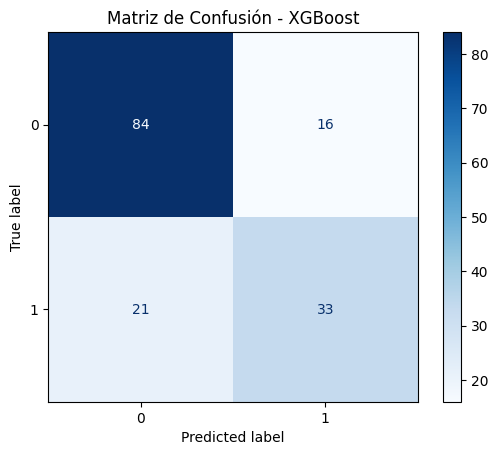

In [4]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=xgb_clf.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy del modelo optimizado: 0.7402597402597403

Reporte de clasificación optimizado:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                       

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


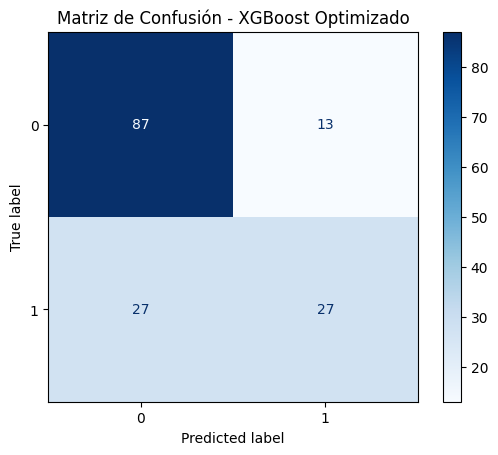

In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
xgb_best = grid_search.best_estimator_

y_pred_best = xgb_best.predict(X_test)
print("Accuracy del modelo optimizado:", accuracy_score(y_test, y_pred_best))
print("\nReporte de clasificación optimizado:\n", classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best, display_labels=xgb_best.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost Optimizado")
plt.show()


El modelo optimizado no mejoró en el aspecto más importante (detectar pacientes con diabetes).

Redujo el recall y el F1-score de la clase 1, que era clave en este caso clínico.

Esto puede deberse a:

Que los hiperparámetros elegidos no fueron ideales (a veces GridSearchCV sobreajusta).

Que el modelo base ya estaba cerca de su mejor rendimiento.

GridSearchCV mejorado para XGBoost (scoring='f1')

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, s

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsa

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END cols

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END 

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END c

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END co

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsamp

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.0s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.0s
[CV]

/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:38:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s


/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/Ejercicio_XGBOOST_Rene/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0; total time=   0.1s
🔍 Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 2, 'subsample': 1.0}
🎯 Accuracy final: 0.7597402597402597

🧾 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       100
           1       0.62      0.83      0.71        54

    accuracy                           0.76       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.79      0.76      0.77       154



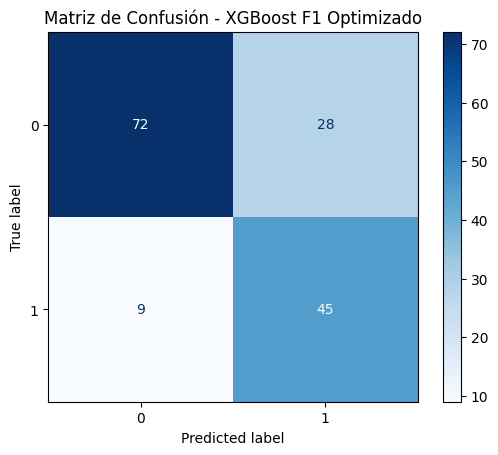

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.2],
    'scale_pos_weight': [1, 2],
    'min_child_weight': [1, 5]
}

xgb_tuned = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_tuned,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("🔍 Mejores parámetros encontrados:", grid_search.best_params_)
xgb_final = grid_search.best_estimator_

y_pred_final = xgb_final.predict(X_test)
print("🎯 Accuracy final:", accuracy_score(y_test, y_pred_final))
print("\n🧾 Reporte de clasificación:\n", classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)
ConfusionMatrixDisplay(cm_final, display_labels=xgb_final.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost F1 Optimizado")
plt.show()


Conclusión técnica:
Este es claramente el mejor modelo hasta ahora.

Mayor sensibilidad, mejor F1 y mismo accuracy.